# Goal: To predict price of a particular house using information like house area, number of bedrooms, number of bathrooms, and utilities

# 1. Import necessary libraries, load datasets

## 1.1 import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import norm

# ML models
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score


# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# metrics to evaluate regression model
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## 1.2 Load datasets

In [13]:
train_df=pd.read_csv('train.csv') # contains features and target variable (prices)
test_df =pd.read_csv('test.csv') # only features; 


In [14]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
train_df.shape

(1460, 81)

In [16]:
test_df.head() # test_df had same features as train_df except SalePrice (target var)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
test_df['SalePrice']=100000 # add SalePrice=100000 column to test_df to make data QC easier... but will remove thsi column when splitting the test dataset

In [18]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,100000
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,100000
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,100000
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,100000
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,100000


In [19]:
test_df.shape

(1459, 81)

## add source column with value = train for train_df rows, =test for test_df rows before concatenate two data frames

In [20]:
test_df['Source']='Test'
train_df['Source']='Train'

In [21]:
df=pd.concat([train_df,test_df],axis=0)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Train


In [24]:
#df.describe().T

# 2. Data Processing

## 2.1 Missing values

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
GarageArea         1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
SaleType           1
Exterior2nd        1
Exterior1st        1
TotalBsmtSF        1
BsmtFinSF2         1
Electrical         1
TotRmsAbvGrd       0
dtype: int64


<AxesSubplot:>

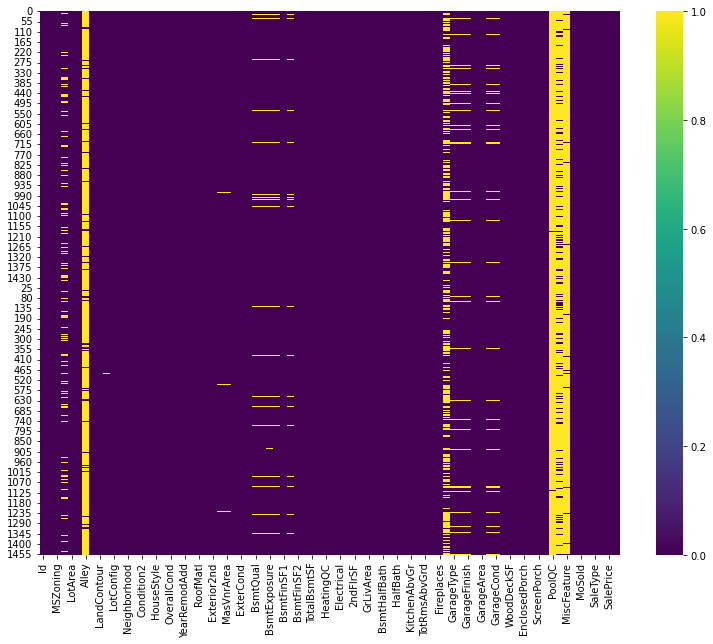

In [23]:
print(df.isnull().sum().sort_values(ascending=False)[:35]) # print sum of missing values

fig, ax = plt.subplots(figsize=(13,10))   
sns.heatmap(df.isnull(), cmap='viridis', ax=ax) # heatmap of missing values

In [26]:
df.shape

(2919, 82)

# 2.2 EDA

## 2.2.1 Distribution of SalePrice (target var)

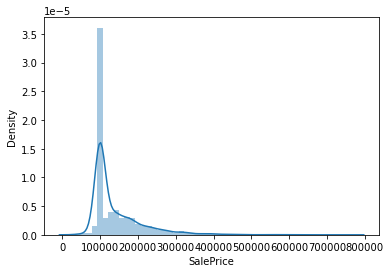

In [27]:
sns.distplot(df['SalePrice'], kde=True);  # more 100k houses because all rows in test_df had constant 100k value for Sale Price

# 2.3 Numeric columns

In [29]:
num_cols=df.select_dtypes(exclude='object')
num_cols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [30]:
num_cols.shape

(2919, 38)

In [31]:
# separate target variable
target=num_cols['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [32]:
target.isnull().sum() # Are any missing values in SalePrice?

0

In [33]:
# all numeric features except target variable
num_cols_features=num_cols.drop(['SalePrice'],axis=1)
num_cols_features.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,548.0,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,460.0,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,608.0,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,642.0,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,836.0,192,84,0,0,0,0,0,12,2008


In [34]:
num_cols_features.shape

(2919, 37)

In [35]:
# are any missing values in numeric columns?
num_cols_features.isnull().sum().sort_values(ascending=False).head(15)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
dtype: int64

## 2.3.1 plotting relationship of numerical variables with target (SalePrice)

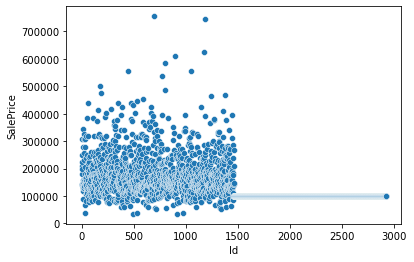

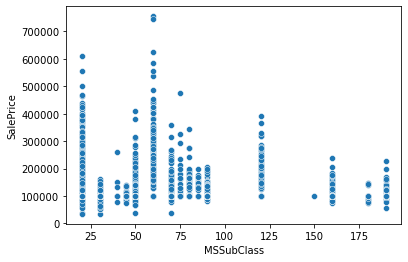

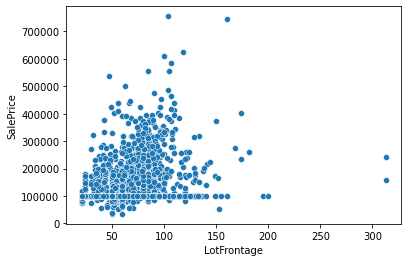

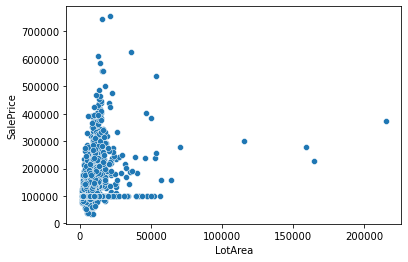

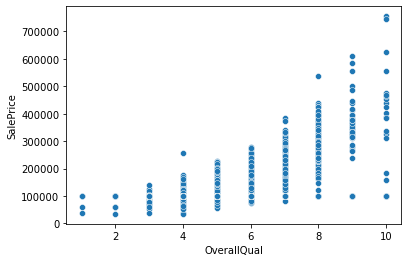

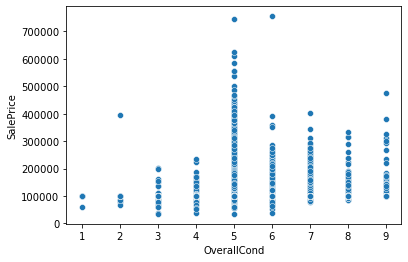

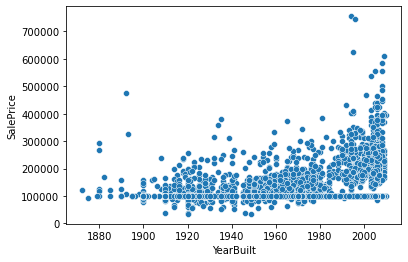

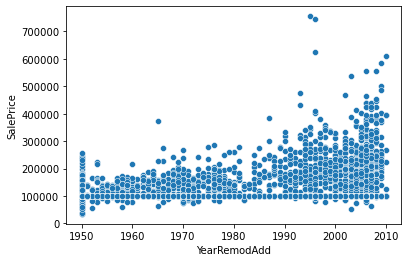

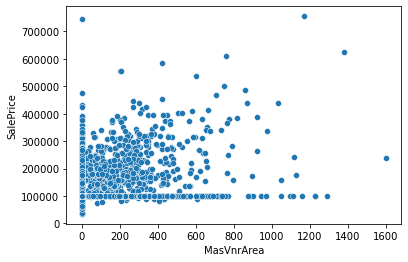

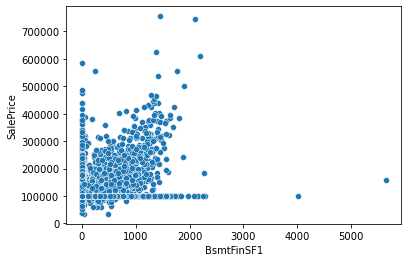

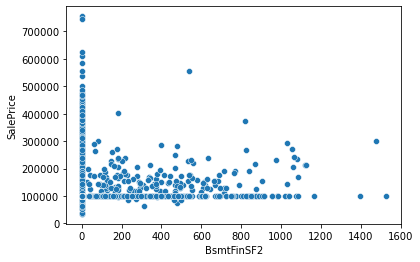

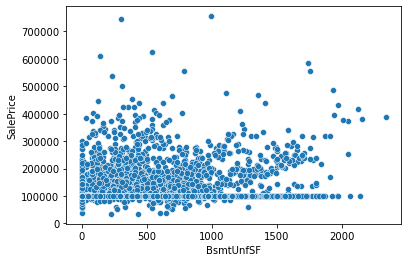

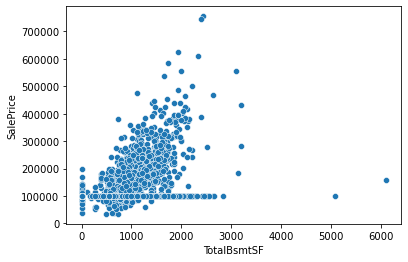

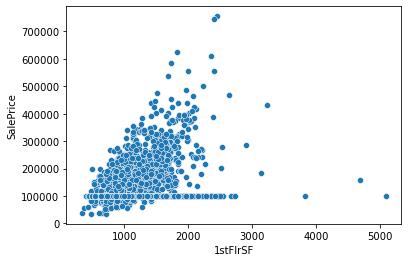

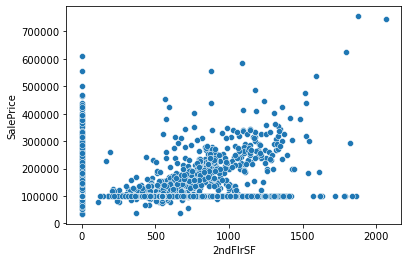

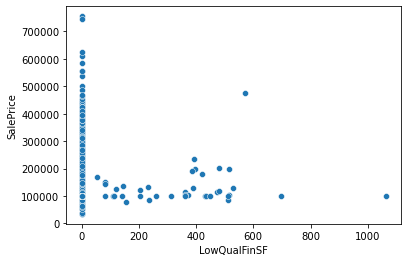

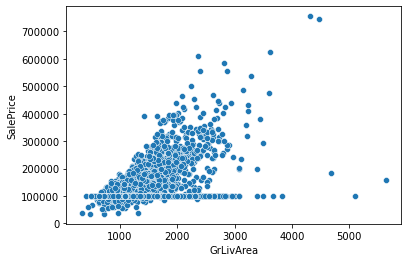

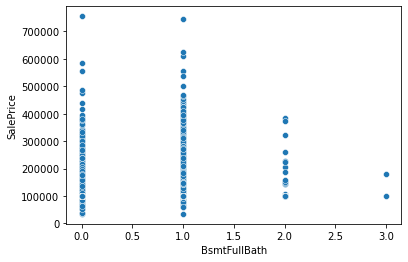

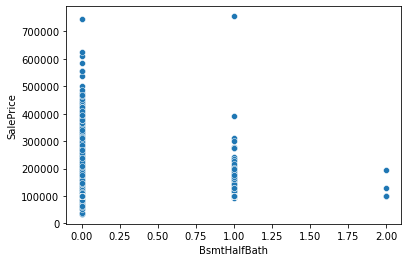

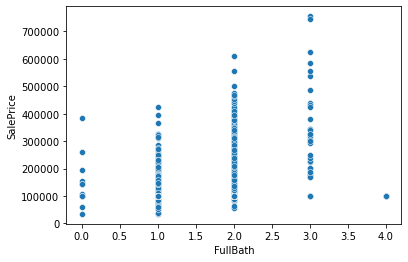

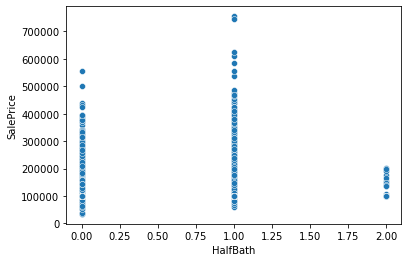

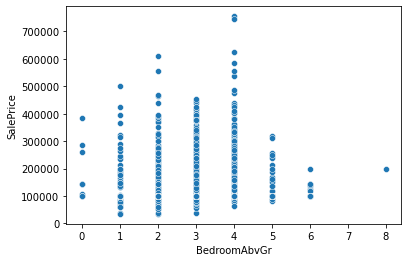

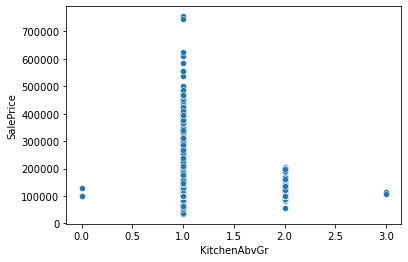

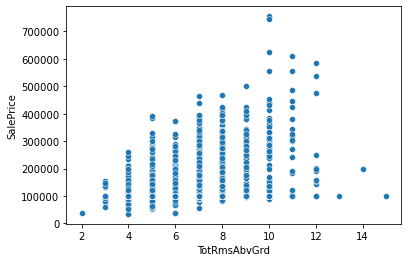

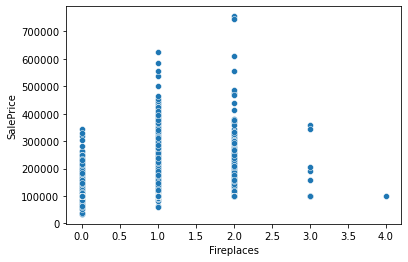

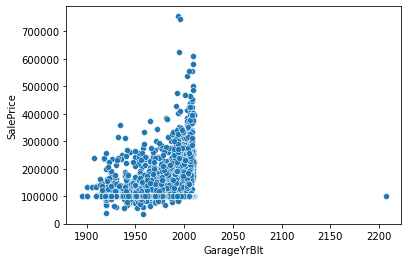

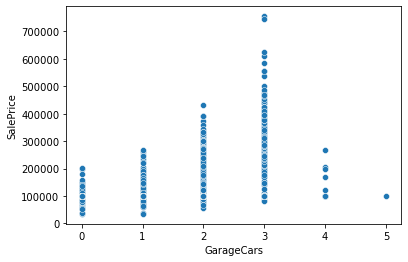

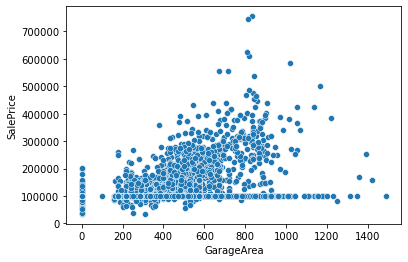

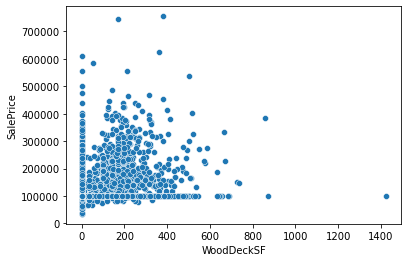

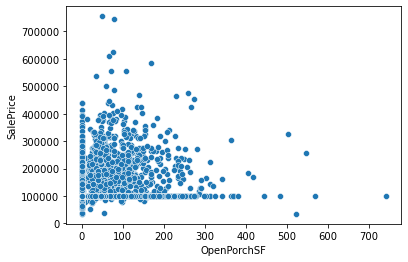

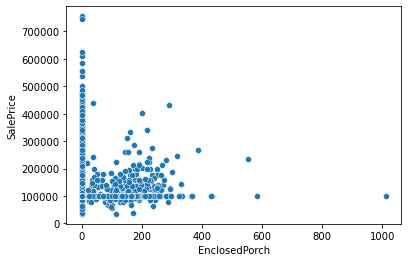

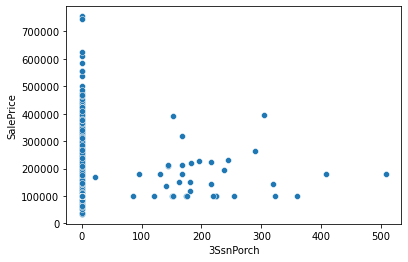

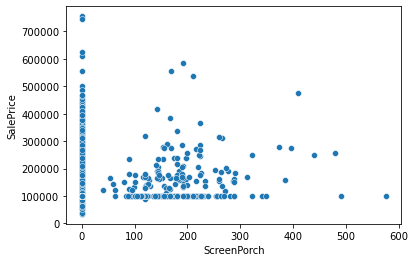

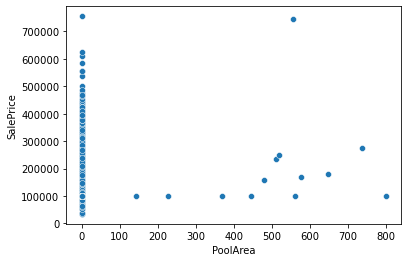

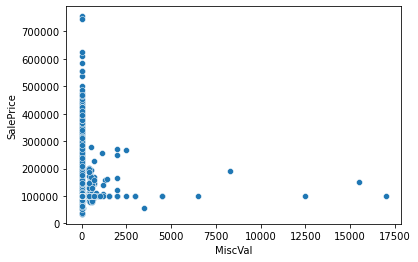

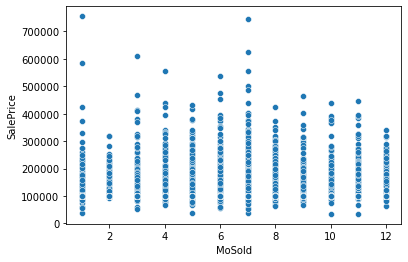

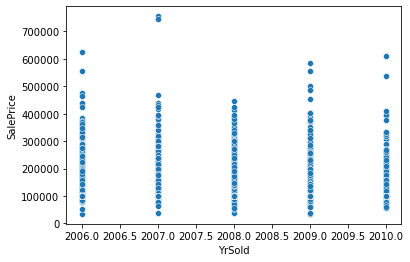

In [36]:
for i in num_cols_features:
    sns.scatterplot(x=num_cols_features[i], y=target)
    plt.show()

#####  Id, MSSubClass, LotQuanFinSF,  BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold is not related linearly with SalePrice
#### LotFontage, Lotarea,  WoodDeckSF, OpenPorchSF, had some relation with SalePrice
### TotalBmsSF, OverallQual,BsmtFinSF1, 1stFlrSF, 2ndFlrSF, GrLivArea, GarageArea related linearly with SalePrice

18


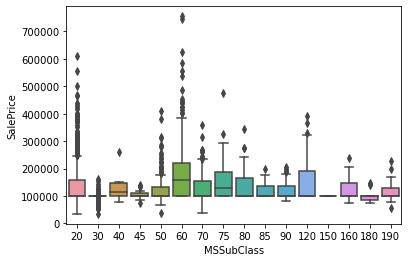

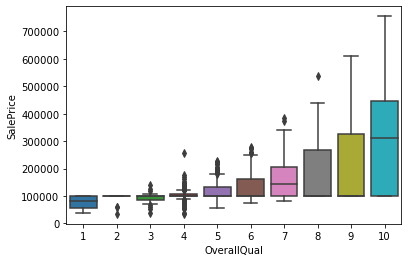

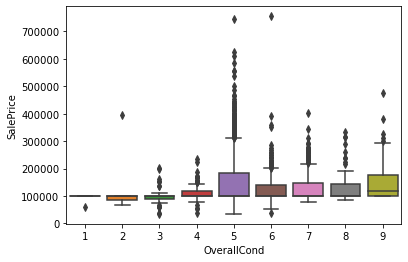

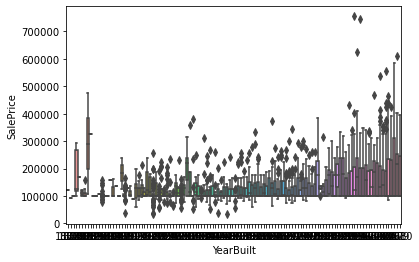

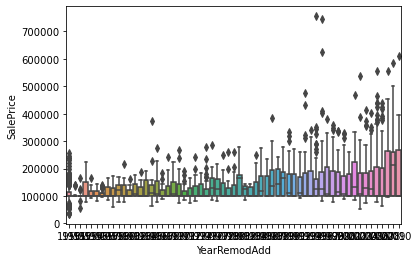

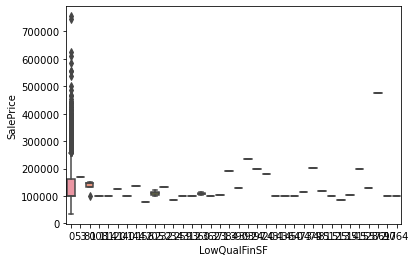

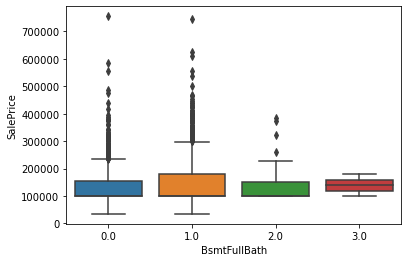

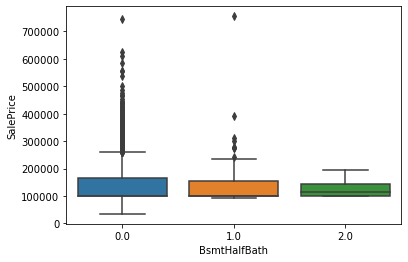

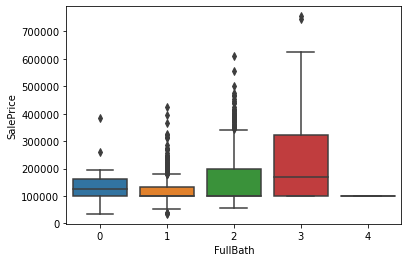

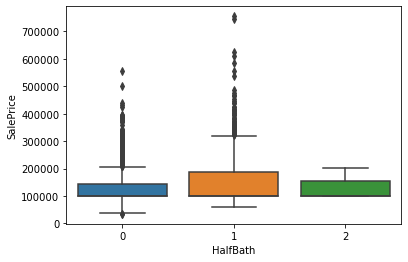

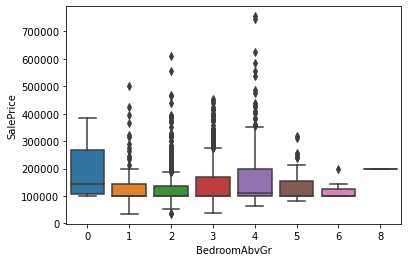

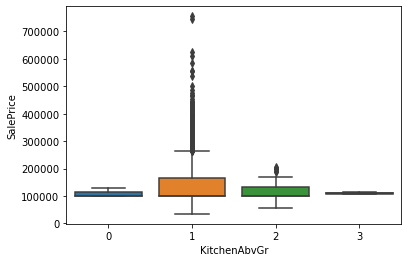

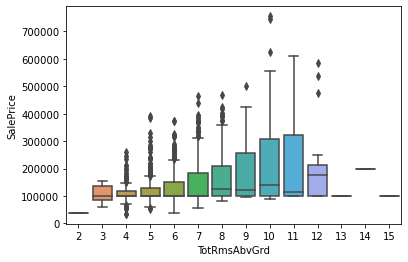

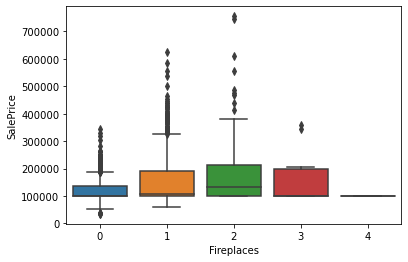

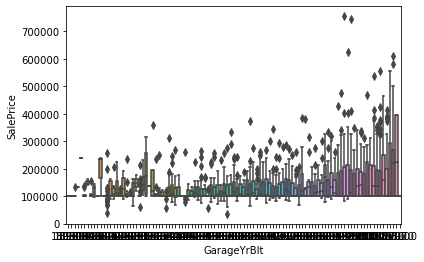

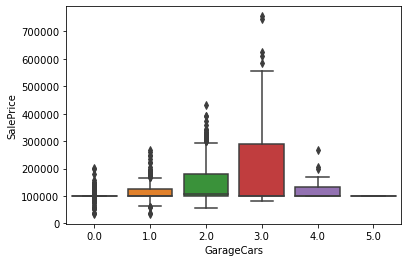

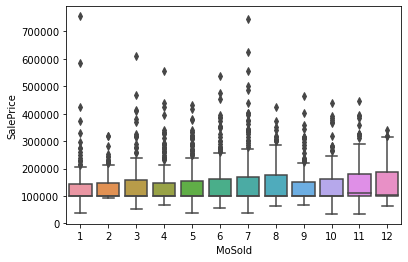

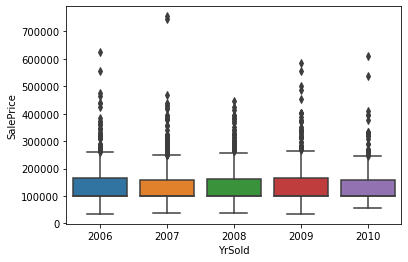

In [37]:
cols=['MSSubClass', 'OverallQual','OverallCond','YearBuilt','YearRemodAdd','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold']
print(len(cols))
for i in cols:
    sns.boxplot(x=num_cols_features[i], y=target)
    plt.show()


#### Pricing factors: 3 full bath's, 2 fireplaces, 3 garages, overall quality, recently built houses had higher prices.

# 2.2 Categorical Variables

In [39]:
cat_fea=df.select_dtypes(include='object')
cat_fea.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Source
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Train
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Train
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Train
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,Train
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,Train


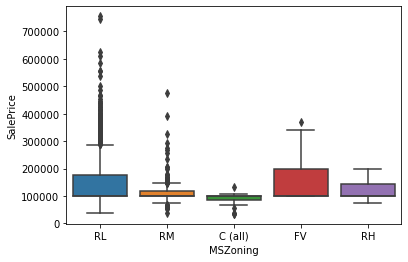

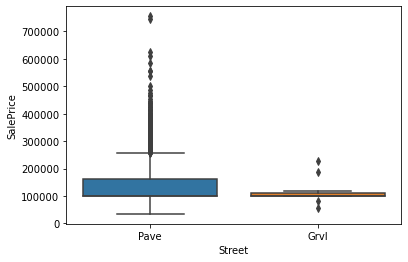

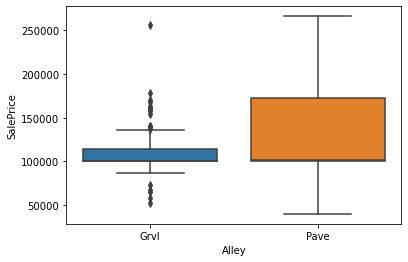

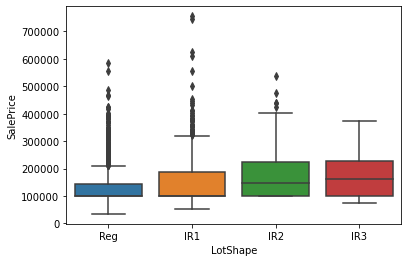

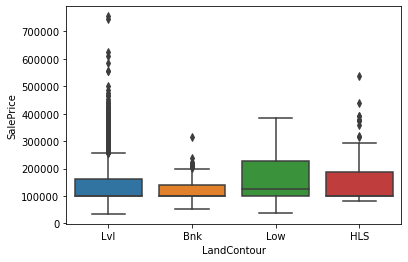

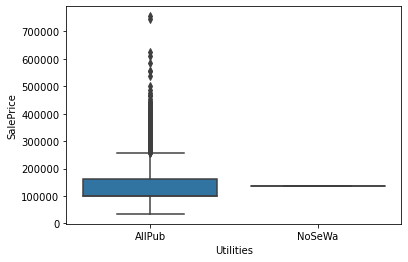

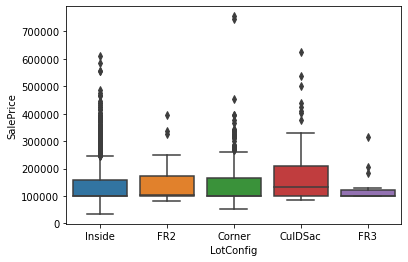

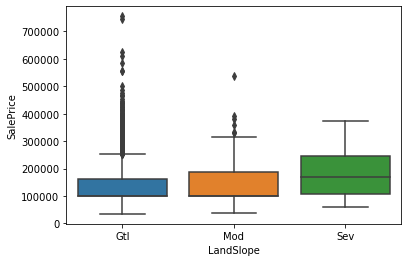

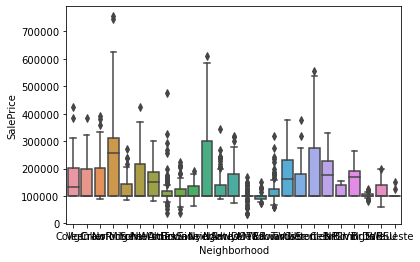

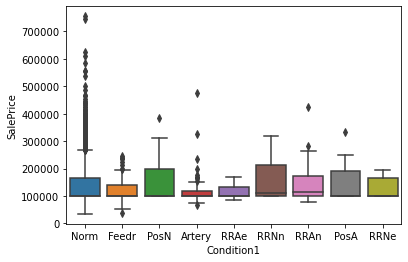

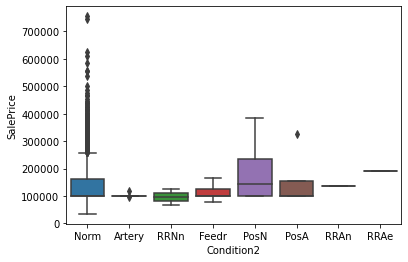

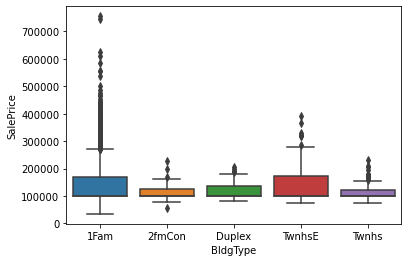

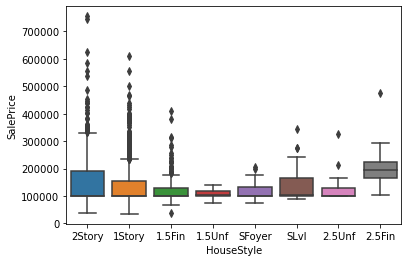

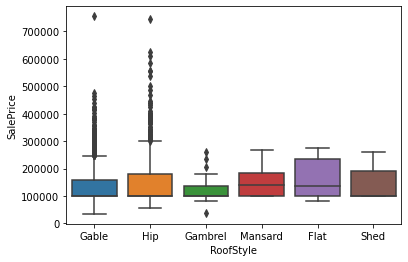

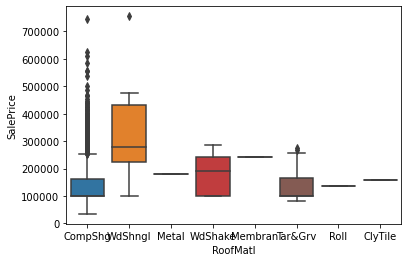

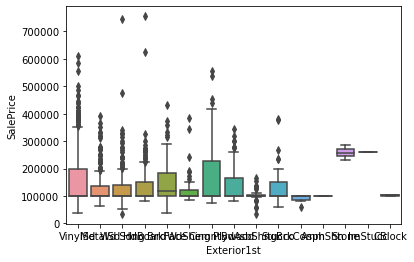

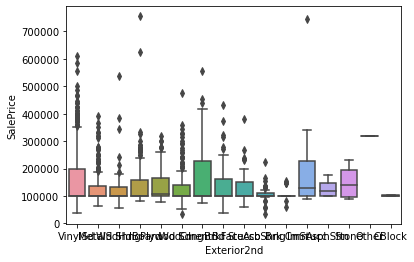

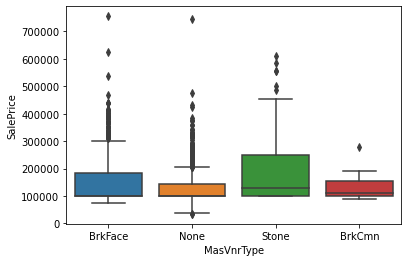

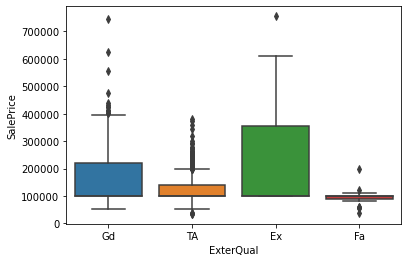

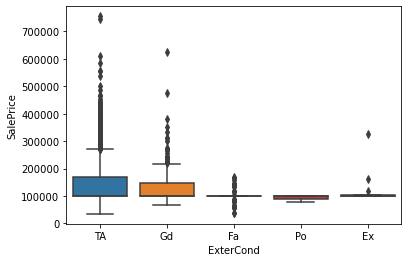

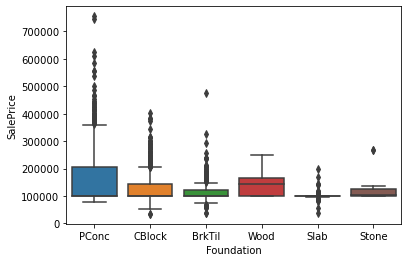

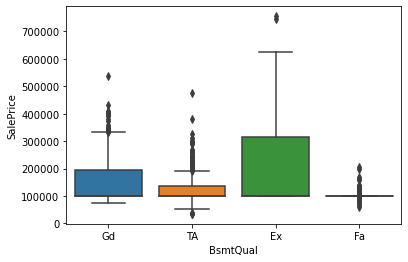

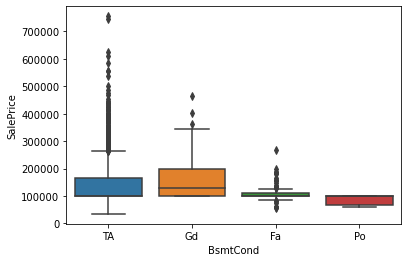

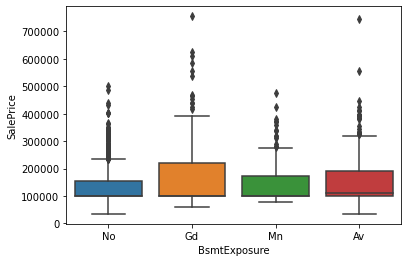

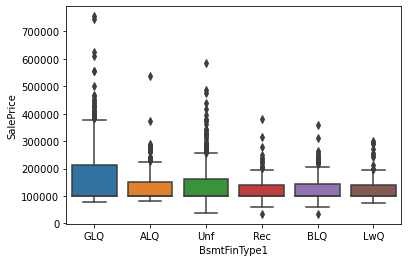

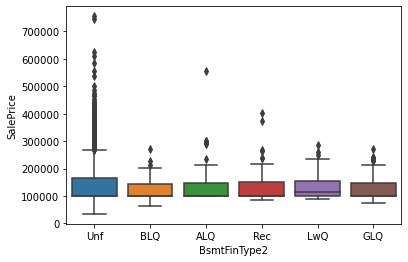

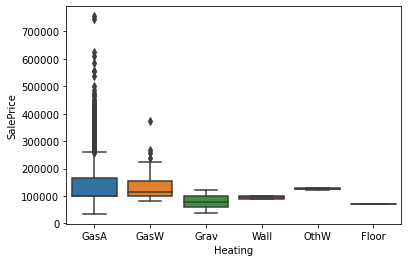

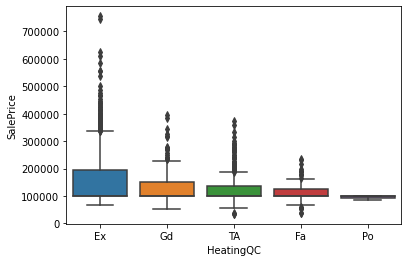

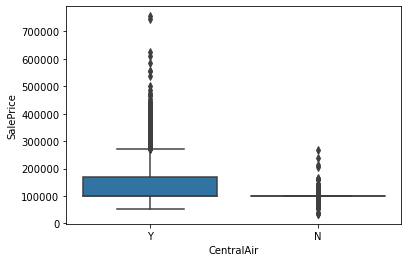

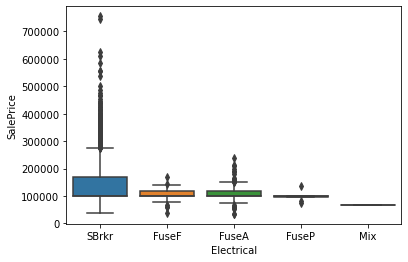

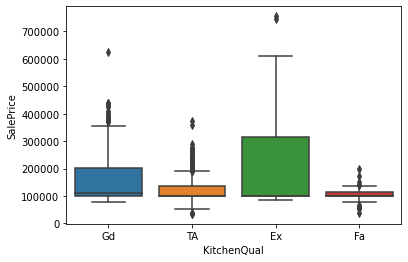

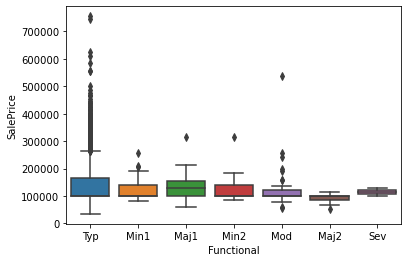

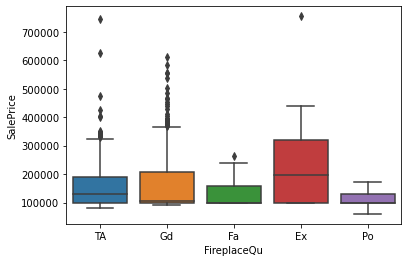

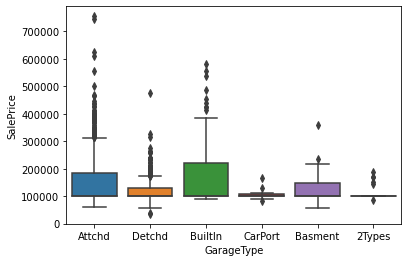

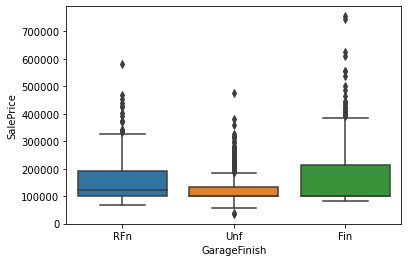

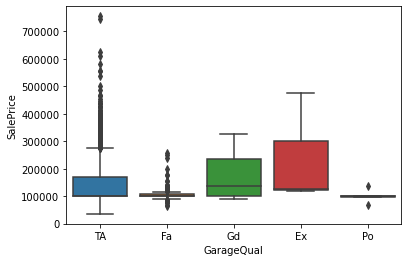

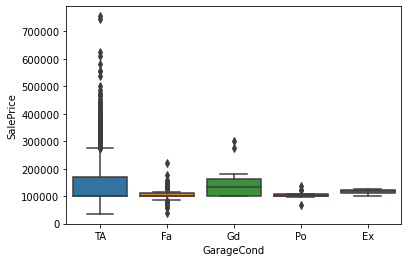

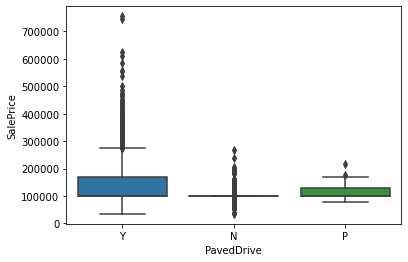

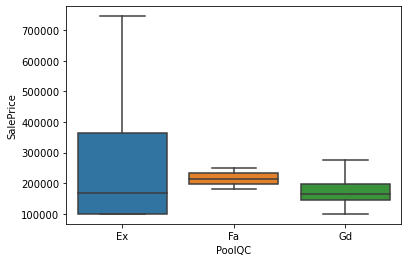

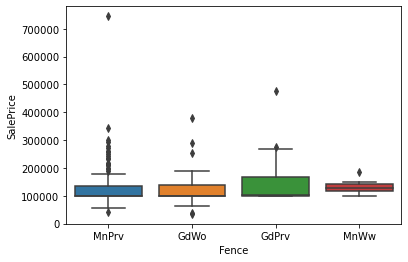

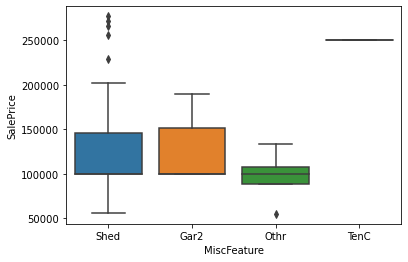

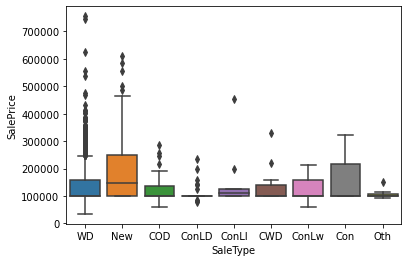

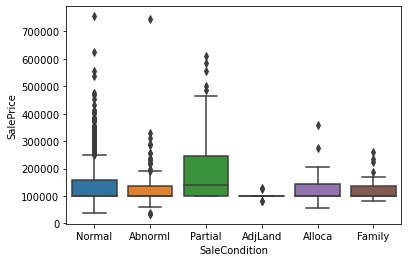

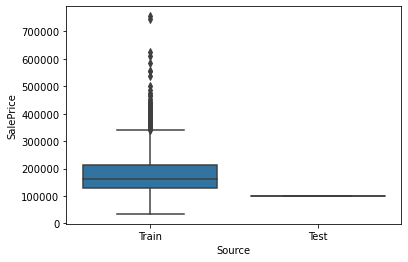

In [41]:
for j in cat_fea:
    sns.boxplot(x=cat_fea[j], y=target)
    plt.show()

# 2.3 Correlation matrix

In [444]:
#df.head()

<AxesSubplot:>

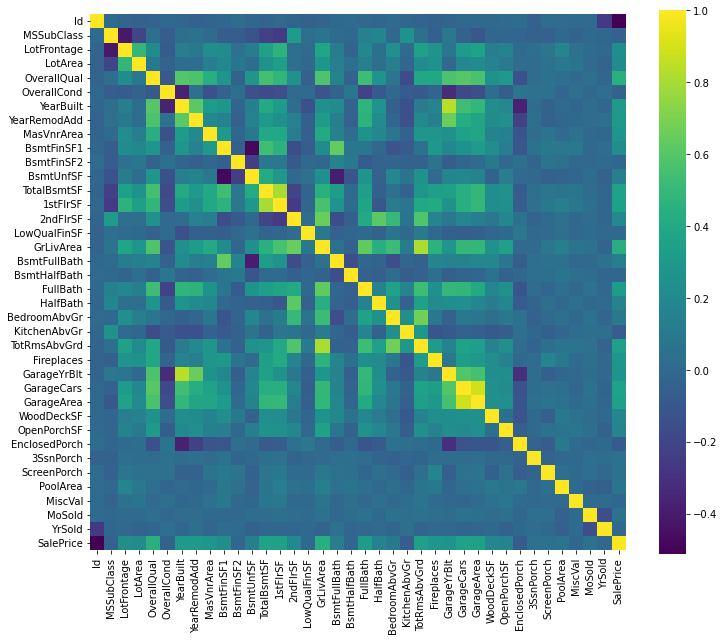

In [42]:
corr_mat=df.corr()
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(corr_mat, cmap='viridis', square=True)

# 2.4 Plot top 10 correlated features with values

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'GarageArea', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearRemodAdd'],
      dtype='object')


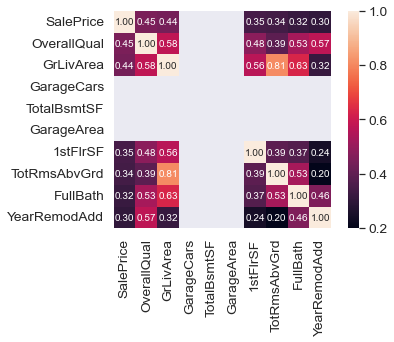

In [43]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_mat.nlargest(k, 'SalePrice')['SalePrice'].index
print(cols)
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Summary: OverallQual, GrLivArea are more correlated with SalePrice. GarageCars and GarageArea seems to be colinear features, will have same info means # of cars fit in Garage depends on Garage Size. So, keep only GarageCars column. Similary, TotalBsmtSF and 1stFlrSF are coliniear, keep TotalBsmtSF column. FullBath, TotRmsAbvGrd, Year Built seem correlated with Sale price 

# 2.4 Handling missing data

In [68]:
miss_sum=df.isnull().sum()
perc_miss=(df.isnull().sum()/df.isnull().count())*100
missing=pd.concat([miss_sum,perc_miss], axis=1, keys=['Sum_of_missing', 'Percent_missing'])
data=missing.reset_index().sort_values(['Percent_missing'], ascending=False).head(35)
data

,index,Sum_of_missing,Percent_missing
72,PoolQC,2909,99.657417
74,MiscFeature,2814,96.402878
6,Alley,2721,93.216855
73,Fence,2348,80.438506
57,FireplaceQu,1420,48.646797
3,LotFrontage,486,16.649538
63,GarageQual,159,5.447071
64,GarageCond,159,5.447071
60,GarageFinish,159,5.447071
59,GarageYrBlt,159,5.447071


#### Consider removing features with >15% missing. Also, these are not important features determining house prices.All the garage features except GarageCars had ~5% similar missing data, since GarageCars had less missing data and useful info, I am keeping this column and remove rest of the Garage features. Similarly, keep BsmtSF and remove (BsmtFinType2, BsmtExposure, BsmtQual, BsmtCond, BsmtFinType1 features). MasVnrArea and MasVnrType are not important features, so dropping them doesn't hurt. Finally, some feature had just 1 missing value, so I am dropping those rows.

### 2.4 Summary of handling missing data: Dropping all features with >23 missing values.

In [69]:
print(list(data['index'][:18])) # slice features with high missing data
cols_drop=list(data['index'][:18])
data_set=df.drop(df[cols_drop], axis=1)
data_set.head()

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageQual', 'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea']


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,Train


In [70]:
data_set.shape

(2919, 64)

In [71]:
# drop rows with missing values (since some features had 1-4 missing values)
data_set=data_set.dropna()
# Making sure no missing data exist
data_set.isnull().sum().sort_values(ascending=False).head()

Id              0
MSSubClass      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
dtype: int64

# 2.5 Handling Outliers

## 2.5.1 Univariate plot

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

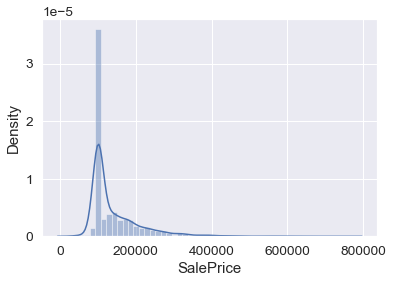

In [72]:
sns.distplot(data_set.SalePrice)

## 2.5.2 Bivariate plots with key features 

### 2.5.2.1 Detect and drop Outliers from key features

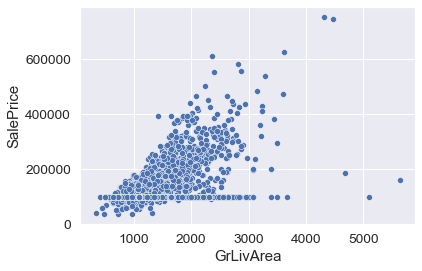

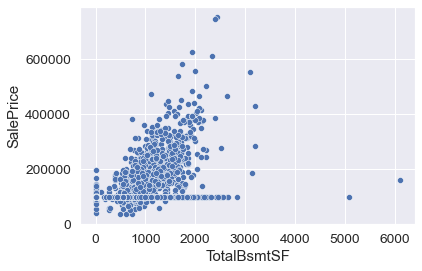

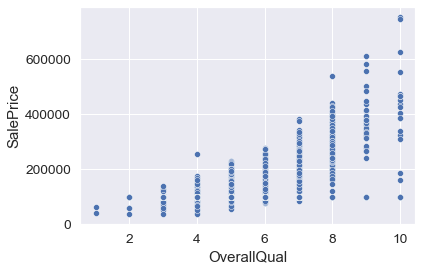

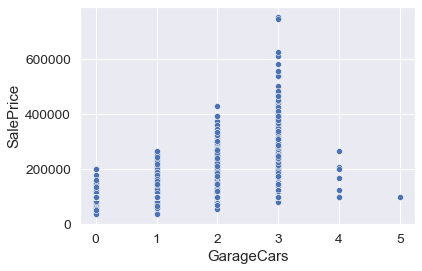

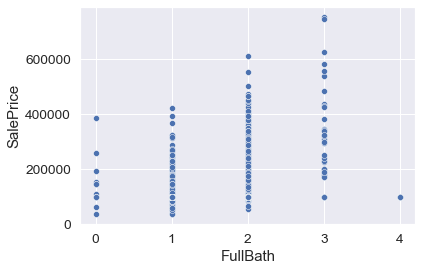

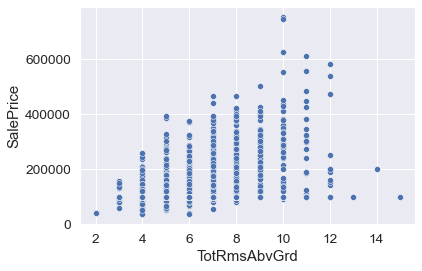

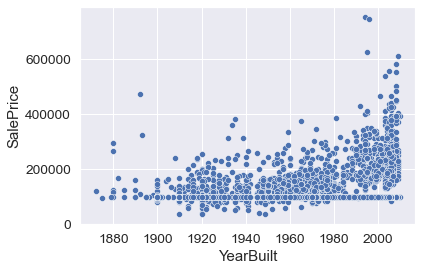

In [73]:
key_features=['GrLivArea','TotalBsmtSF','OverallQual','GarageCars','FullBath', 'TotRmsAbvGrd', 'YearBuilt']
for i in key_features:
    sns.scatterplot(x=data_set[i], y=data_set['SalePrice'])
    plt.show()

#### Outliers are detected with GrLivArea >4500 (but two obs's on top of plot seems to follow linear trend). TotalBsmtSF>6000; TotRmsAbvGrd>12

In [74]:
data_set.shape

(2906, 64)

In [75]:
# drop rows with GrLivArea >4000 but SalePrice <185000 to keep top outliers
df1 = data_set.drop(data_set
                   [(data_set['GrLivArea']>4000) & (data_set['SalePrice']<185000)].index)

df1.shape

(2900, 64)

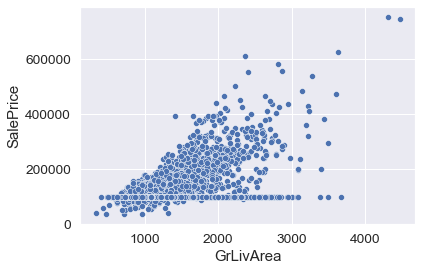

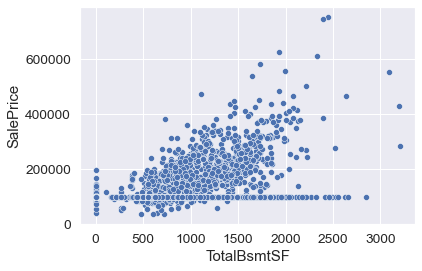

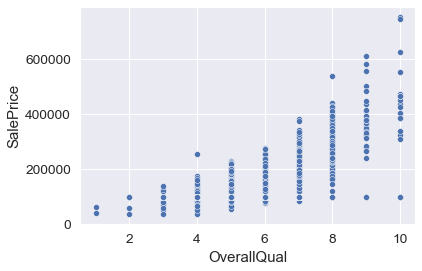

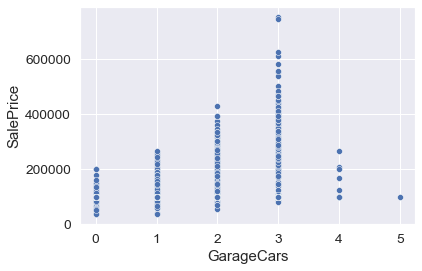

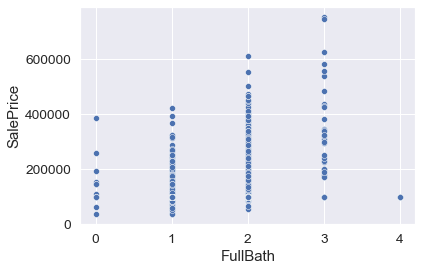

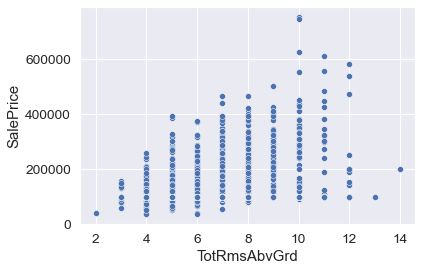

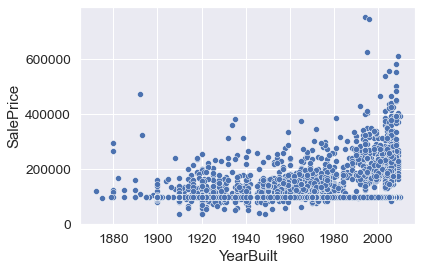

In [76]:
## making sure if outliers are removed from key features

key_features=['GrLivArea','TotalBsmtSF','OverallQual','GarageCars','FullBath', 'TotRmsAbvGrd', 'YearBuilt']
for i in key_features:
    sns.scatterplot(x=df1[i], y=df1['SalePrice'])
    plt.show()

#### TotalBsmtSF>3000 may not be outliers, so not removing them

# 3. Preprocessing

## 3.1 check distribution of target variable

In [77]:
# histogram and probability plot of target variable
#sns.distplot(df1['SalePrice'], fit=norm)
#fig=plt.figure()
#res=stats.probplot(df1['SalePrice'], plot=plt)

### SalePrice is not normally distributed, and had positive skewness. So, apply log transformation

In [78]:
# apply log transformation to target variable to make normally distributed
#df1['SalePrice']=np.log(df1['SalePrice'])

# check if log transformation improved histogram and prob distribution
#sns.distplot(df1['SalePrice'], fit=norm)
#fig=plt.figure()
#res=stats.probplot(df1['SalePrice'], plot=plt)

### Yes, SalePrice is normally distributed........

# 3.2 how about distribution of key features? GrLivArea, ?


In [79]:
#sns.distplot(df1['GrLivArea'], fit=norm);
#fig=plt.figure()
#res=stats.probplot(df1['GrLivArea'], plot=plt)

### GrLivArea is not normally distributed, and had positive skewness. So, apply log transformation

In [80]:
# apply log transformation to variable to make normally distributed
#df1['GrLivArea'] = np.log(df1['GrLivArea'])

# check if log transformation improved histogram and prob distribution
#sns.distplot(df1['GrLivArea'], fit=norm)
#fig=plt.figure()
#res=stats.probplot(df1['GrLivArea'], plot=plt)

## 3.3 how about distribution of key features? TotalBsmtSF?

In [81]:
#sns.distplot(df1['TotalBsmtSF'], fit=norm)
#fig=plt.figure()
#res=stats.probplot(df1['TotalBsmtSF'], plot=plt)

### TotalBsmtSF is not normally distributed had positive skewness. BUT starts with 0 (houses without basement); 0 doesn't allow log transformation; 

In [82]:
#df1.replace([np.inf, -np.inf], np.nan, inplace=True)

In [83]:
# apply log transformation to variable to make normally distributed
#df1['TotalBsmtSF']=np.log(df1['TotalBsmtSF'])

# check if log transformation improved histogram and prob distribution
#sns.distplot(df1['TotalBsmtSF'], fit=norm)
#fig=plt.figure()
#res=stats.probplot(df1['TotalBsmtSF'], plot=plt)


### TotalBsmtSF is not normally distributed had positive skewness. BUT starts with 0 (houses without basement); 0 doesn't allow log transformation; 
1st convert it to binary variable (area>0 give 1 has basement; area=0 give 0 no basement).

In [84]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
#df1['HasBsmt'] = pd.Series(len(df1['TotalBsmtSF']), index=df1.index)
#df1['HasBsmt'] = 0 
#df1.loc[df1['TotalBsmtSF']>0,'HasBsmt'] = 1

In [85]:
# log transform data
#df1.loc[df1['HasBsmt']==1,'TotalBsmtSF'] = np.log(df1['TotalBsmtSF'])

#histogram and normal probability plot
#sns.distplot(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

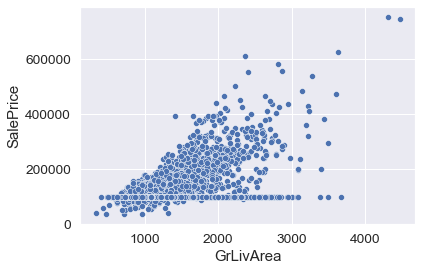

In [86]:
sns.scatterplot(x=df1['GrLivArea'], y=df1['SalePrice'])

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

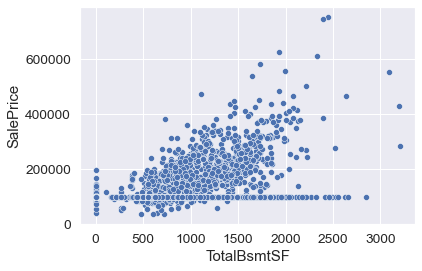

In [87]:
#sns.scatterplot(x=df1[df1['TotalBsmtSF']>0]['TotalBsmtSF'], y=df1['SalePrice'])

sns.scatterplot(x=df1['TotalBsmtSF'], y=df1['SalePrice'])

In [123]:
df1.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Source
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,Train
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,Train
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,Train
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,Train
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,Train


In [124]:
df1.shape

(2900, 64)

## Then handling categorical data of df1

In [125]:
# 3.4 Create dummy variables to categorical variables
dummies=pd.get_dummies(df1)
dummies.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Source_Test,Source_Train
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,1,0,0,0,0,1,0,0,1
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,1,0,0,0,0,1,0,0,1
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,1,0,0,0,0,1,0,0,1
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,1,1,0,0,0,0,0,0,1
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,1,0,0,0,0,1,0,0,1


In [126]:
#check if column contains infinite value, replaced the +/-inf values into nan's and droped rows with nan's
dummies.replace([np.inf, -np.inf], np.nan, inplace=True)
dummies.dropna()
dummies.shape

(2900, 223)

In [127]:
# check if any missing values in features after preprocessing
dummies.isnull().sum().sort_values(ascending=False)

Id                      0
Exterior2nd_Plywood     0
Exterior1st_WdShing     0
Exterior2nd_AsbShng     0
Exterior2nd_AsphShn     0
                       ..
Neighborhood_SWISU      0
Neighborhood_Sawyer     0
Neighborhood_SawyerW    0
Neighborhood_Somerst    0
Source_Train            0
Length: 223, dtype: int64

## Final dataset

In [150]:
# Rearrange columns of dummies so that SalePrice is last column

cols=dummies.columns.tolist() # list of dummies columns
#print(cols)
index=dummies.columns.get_loc("SalePrice") # index of SalePrice column
print(index)

new_cols=cols[0:index] + cols[index+1:]+ cols[index:index+1] # Rearrange columns of dummies so that SalePrice is last column
final_data=dummies[new_cols]
final_data.head()

34


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Source_Test,Source_Train,SalePrice
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,1,0,0,0,0,1,0,0,1,208500
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,1,0,0,0,0,1,0,0,1,181500
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,1,0,0,0,0,1,0,0,1,223500
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,1,1,0,0,0,0,0,0,1,140000
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,1,0,0,0,0,1,0,0,1,250000


In [151]:
final_data.shape

(2900, 223)

# Establish test dataset, test numpy array for ML models

In [152]:
training_data=final_data.loc[final_data['Source_Train']==1]
training_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Source_Test,Source_Train,SalePrice
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,1,0,0,0,0,1,0,0,1,208500
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,1,0,0,0,0,1,0,0,1,181500
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,1,0,0,0,0,1,0,0,1,223500
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,1,1,0,0,0,0,0,0,1,140000
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,1,0,0,0,0,1,0,0,1,250000


In [153]:
training_data.shape

(1456, 223)

In [154]:
training_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'Source_Test', 'Source_Train', 'SalePrice'],
      dtype='object', length=223)

In [155]:
training_data.drop(columns=['Source_Test','Source_Train'], axis=1, inplace=True)
training_data.head()                                    

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1,60,8450,7,5,2003,2003,706.0,0.0,150.0,...,0,0,1,0,0,0,0,1,0,208500
1,2,20,9600,6,8,1976,1976,978.0,0.0,284.0,...,0,0,1,0,0,0,0,1,0,181500
2,3,60,11250,7,5,2001,2002,486.0,0.0,434.0,...,0,0,1,0,0,0,0,1,0,223500
3,4,70,9550,7,5,1915,1970,216.0,0.0,540.0,...,0,0,1,1,0,0,0,0,0,140000
4,5,60,14260,8,5,2000,2000,655.0,0.0,490.0,...,0,0,1,0,0,0,0,1,0,250000


In [156]:
# test data without SalePrice column
test_data=final_data.loc[final_data['Source_Test']==1]
test_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Source_Test,Source_Train,SalePrice
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,1,0,0,0,0,1,0,1,0,100000
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,1,0,0,0,0,1,0,1,0,100000
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,1,0,0,0,0,1,0,1,0,100000
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,1,0,0,0,0,1,0,1,0,100000
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,1,0,0,0,0,1,0,1,0,100000


In [157]:
test_data.drop(columns=['Source_Test','Source_Train', 'SalePrice'], axis=1, inplace=True)
test_data.head()  

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [160]:
test_data.shape

(1444, 220)

In [158]:
test_array=test_data.values
print(test_array[:20])

[[1.4610e+03 2.0000e+01 1.1622e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4620e+03 2.0000e+01 1.4267e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4630e+03 6.0000e+01 1.3830e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 ...
 [1.4780e+03 2.0000e+01 1.1520e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4790e+03 2.0000e+01 1.4122e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.4800e+03 2.0000e+01 1.4300e+04 ... 0.0000e+00 1.0000e+00 0.0000e+00]]


In [159]:
test_array.shape

(1444, 220)

# 4. Train Model

## Separating features (X) and target variable (y)

In [161]:
# 4.1 split the data
X=training_data.iloc[:,:-1].values
y=training_data['SalePrice'].values
X

array([[1.000e+00, 6.000e+01, 8.450e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 2.000e+01, 9.600e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 6.000e+01, 1.125e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 9.042e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.459e+03, 2.000e+01, 9.717e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.460e+03, 2.000e+01, 9.937e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

In [162]:
X.shape

(1456, 220)

In [163]:
y

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [164]:
y.shape

(1456,)

# Feature Scaling

In [165]:
scaling=MinMaxScaler(feature_range=(0,1))
X=scaling.fit_transform(X) # Fit and transform MinMaxScaler to features (X)
test_array=scaling.fit_transform(test_array) # Fit and transform MinMaxScaler to test dataset that we set apart


# Train, Test, split data

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1019, 220)
(437, 220)
(1019,)
(437,)


## 4.2 Multiple Linear Regression model

y= a1x1 + a2x2 + a3x3+....+b (linear reg minimizes a loss function (OLS) while choosing coefficients for fitting the model in sklearn. 

In [167]:
# instantiate linearregression
lr=LinearRegression()
# fit leniar regression on training data
lr.fit(X_train, y_train)
# predict on training data
y_trpred=lr.predict(X_train)
# predict on test data
y_pred=lr.predict(X_test)

print('R^2: {}'.format(lr.score(X_test, y_test)))
      
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: {}".format(rmse))

R^2: -2.5832150035853245e+18
Root Mean Square Error: 130622958498495.19


In [168]:
y_pred[:10]

array([215079. , 166831.5, 377559.5, 285211. , 325683. , 223643. ,
       446807. , 199856.5, 152071.5, 117192. ])

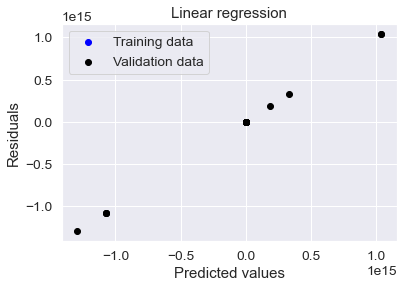

In [169]:
#plot between predicted values and residuals
plt.scatter(y_trpred, y_trpred - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

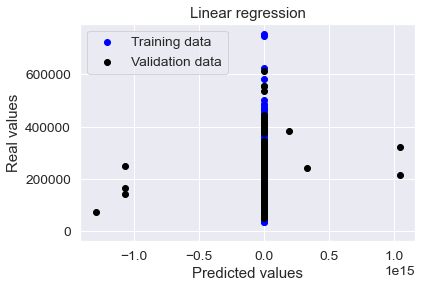

In [170]:
# Plot predictions - Real values
plt.scatter(y_trpred, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# 4.2.1 Five fold cross validation

Cross-validation is a vital step in evaluating a model.

In [171]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
# compute 5-fold cross-val scores
cv_scores=cross_val_score(lr, X, y, cv=5)

print("5-fold cross val scores (i.e R^2 values):{}". format(cv_scores))
print('Mean cross val score or mean R^2 value: {}'.format(np.mean(cv_scores)))

5-fold cross val scores (i.e R^2 values):[-4.24204407e+19 -3.43440657e+19 -3.31709442e+17 -5.70842188e+19
 -3.92776398e+19]
Mean cross val score or mean R^2 value: -3.4691614871419572e+19


### Large coefficients can lead to overfitting of Linear Regression; So, Regularization can penalize overfitting by handling colinearity. 

# 4.3. Ridge Regression
Parameter is alpha like k in KNN (alpha=0 leads to overfitting, very high alpha leads to underfitting) 

In [172]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print('Best alpha',alpha)

# predict on training data
y_trpred=ridge.predict(X_train)
# predict on test data
y_pred=ridge.predict(X_test)
print('R^2 value:{}'.format(ridge.score(X_test, y_test)))
rmse=np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Square Error: {}".format(rmse))

Best alpha 1.0
R^2 value:0.8929070044430053
Root Mean Square Error: 26596.211139313295


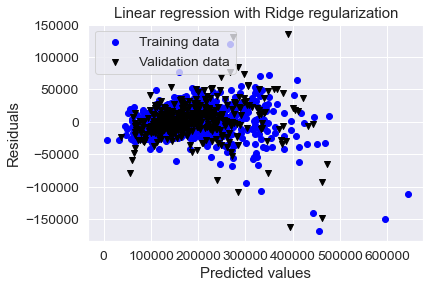

In [173]:
# Plot residuals
plt.scatter(y_trpred, y_trpred - y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

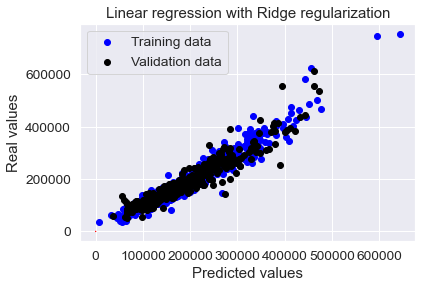

In [174]:
# Plot predictions - Real values
plt.scatter(y_trpred, y_train, c = "blue",  label = "Training data")
plt.scatter(y_pred, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# 4.4. Lasso Regression


In [176]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
y_pred=lasso.predict(X_test)
print('R^2 value:{}'.format(lasso.score(X_test, y_test)))

R^2 value:0.8838215997894492


# Predictions

In [537]:
test_data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
4,1465,120,5005,8,5,1992,1992,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0
5,1466,60,10000,6,5,1993,1994,0.0,0.0,763.0,...,0,0,0,1,0,0,0,0,1,0
6,1467,20,7980,6,7,1992,2007,935.0,0.0,233.0,...,0,0,0,1,0,0,0,0,1,0
7,1468,60,8402,6,5,1998,1998,0.0,0.0,789.0,...,0,0,0,1,0,0,0,0,1,0
8,1469,20,10176,7,5,1990,1990,637.0,0.0,663.0,...,0,0,0,1,0,0,0,0,1,0


In [538]:
test_array[:10]

array([[0.00000000e+00, 5.88235294e-01, 6.99944559e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.87757909e-04, 2.35294118e-01, 1.68897513e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.37551582e-03, 0.00000000e+00, 1.28900681e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.81430536e-03, 8.23529412e-01, 4.15808649e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [5.50206327e-03, 8.23529412e-01, 4.15808649e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.18982118e-03, 8.23529412e-01, 1.60383336e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [568]:
#predictied values
new_pred=lr.predict(test_array)
new_pred

array([10.45363049, 10.45912245, 10.45692301, ..., 10.46061879,
       10.46211779, 10.46115707])

In [569]:
# predicted values dataframe
predicted_data=pd.DataFrame({'Id':test_data['Id'],
                            'SalePrice_Predicted':new_pred})
predicted_data.head()

,Id,SalePrice_Predicted
4,1465,10.453630
5,1466,10.459122
6,1467,10.456923
7,1468,10.458368
8,1469,10.462245


In [570]:
pred_df=pd.concat([predicted_data, True_values], axis=1)
pred_df.head()

,Id,SalePrice_Predicted,SalePrice
4,1465,10.453630,11.923246
5,1466,10.459122,12.084758
6,1467,10.456923,12.055660
7,1468,10.458368,12.073175
8,1469,10.462245,11.995424


In [572]:
pd.DataFrame({'True Values': True_values, 'Predicted Values': new_pred}).hvplot.scatter(x='True Values', y='Predicted Values')


AttributeError: 'DataFrame' object has no attribute 'hvplot'